In [14]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

In [15]:
input_csv = "../results-yasmin/sqlite-bench.csv"
baseline = "x86_64,qemu,qemu"
base_arch, base_runtime, base_tag = baseline.split(',')
df = pd.read_csv(input_csv, sep=';')
# fix naming of bench
new_rows = []
for row in df.itertuples():
    dct = row._asdict()
    _, test_nr, serie = dct['bench'].strip().split('-')
    if serie == "batch":
        continue
    #dct['test'] = test_nr
    dct['label'] = f"{test_nr}-{serie}"
    del dct['Index']
    new_rows.append(dct)
df = pd.DataFrame(new_rows)
df

,arch,bench,cmdline,dataset,threads,unit,value,retval,runtime,tag,label
0,aarch64,micro.sqlite-1-multi,/home/redha/benchmarks/sqlite-bench/sqlite-ben...,none,1.0,ms,1071.0,0,native,native,1-multi
1,aarch64,micro.sqlite-2-multi,/home/redha/benchmarks/sqlite-bench/sqlite-ben...,none,1.0,ms,744.0,0,native,native,2-multi
2,aarch64,micro.sqlite-3-multi,/home/redha/benchmarks/sqlite-bench/sqlite-ben...,none,1.0,ms,2777.0,0,native,native,3-multi
3,aarch64,micro.sqlite-4-multi,/home/redha/benchmarks/sqlite-bench/sqlite-ben...,none,1.0,ms,2294.0,0,native,native,4-multi
4,aarch64,micro.sqlite-5-multi,/home/redha/benchmarks/sqlite-bench/sqlite-ben...,none,1.0,ms,5476.0,0,native,native,5-multi
...,...,...,...,...,...,...,...,...,...,...,...
315,aarch64,micro.sqlite-12-multi,/home/redha/benchmarks/sqlite-bench/sqlite-ben...,none,1.0,ms,1090.0,0,native,native,12-multi
316,aarch64,micro.sqlite-13-multi,/home/redha/benchmarks/sqlite-bench/sqlite-ben...,none,1.0,ms,416.0,0,native,native,13-multi
317,aarch64,micro.sqlite-14-multi,/home/redha/benchmarks/sqlite-bench/sqlite-ben...,none,1.0,ms,760.0,0,native,native,14-multi
318,aarch64,micro.sqlite-15-multi,/home/redha/benchmarks/sqlite-bench/sqlite-ben...,none,1.0,ms,235.0,0,native,native,15-multi


In [16]:
base_df = df.loc[df['tag'] == 'qemu']
base_df

,arch,bench,cmdline,dataset,threads,unit,value,retval,runtime,tag,label
80,x86_64,micro.sqlite-1-multi,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ms,1331.0,0,qemu,qemu,1-multi
81,x86_64,micro.sqlite-2-multi,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ms,13484.0,0,qemu,qemu,2-multi
82,x86_64,micro.sqlite-3-multi,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ms,23610.0,0,qemu,qemu,3-multi
83,x86_64,micro.sqlite-4-multi,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ms,52011.0,0,qemu,qemu,4-multi
84,x86_64,micro.sqlite-5-multi,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ms,160677.0,0,qemu,qemu,5-multi
...,...,...,...,...,...,...,...,...,...,...,...
155,x86_64,micro.sqlite-12-multi,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ms,5584.0,0,qemu,qemu,12-multi
156,x86_64,micro.sqlite-13-multi,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ms,2667.0,0,qemu,qemu,13-multi
157,x86_64,micro.sqlite-14-multi,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ms,9057.0,0,qemu,qemu,14-multi
158,x86_64,micro.sqlite-15-multi,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ms,1863.0,0,qemu,qemu,15-multi


In [17]:
import re 

def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

In [18]:
# Get the mean for each baseline benchmark
base_means = {}
for b in set(base_df['bench']):
    base_means[b] = np.array(base_df.loc[base_df['bench'] == b]['value'].values, dtype=np.float32).mean()
sorted_nicely(base_means)

['micro.sqlite-1-multi',
 'micro.sqlite-2-multi',
 'micro.sqlite-3-multi',
 'micro.sqlite-4-multi',
 'micro.sqlite-5-multi',
 'micro.sqlite-6-multi',
 'micro.sqlite-7-multi',
 'micro.sqlite-8-multi',
 'micro.sqlite-9-multi',
 'micro.sqlite-10-multi',
 'micro.sqlite-11-multi',
 'micro.sqlite-12-multi',
 'micro.sqlite-13-multi',
 'micro.sqlite-14-multi',
 'micro.sqlite-15-multi',
 'micro.sqlite-16-multi']

In [19]:
# Print the mean of every benchmark for each runtime
mean_df = pd.DataFrame()
for b in sorted(set(df['bench'])):
    df_b = df.loc[df['bench'] == b]
    tmp_dict = { 'bench': b }
    for t in set(df_b['tag']):
        df_b_t = df_b.loc[df_b['tag'] == t]
        tmp_dict[t] = np.mean(df_b_t['value'])
    #tmp_dict['serie'] = b.split('-')[-1:][0]
    mean_df = mean_df.append(tmp_dict, ignore_index=True)
mean_df

,bench,native,qemu,risotto
0,micro.sqlite-1-multi,1034.7,1337.2,1026.4
1,micro.sqlite-10-multi,414.9,7099.6,437.6
2,micro.sqlite-11-multi,1179.7,11753.6,1203.0
3,micro.sqlite-12-multi,1058.9,5601.2,1067.0
4,micro.sqlite-13-multi,421.5,2693.2,418.4
5,micro.sqlite-14-multi,762.7,9038.0,773.4
6,micro.sqlite-15-multi,231.6,1882.0,242.6
7,micro.sqlite-16-multi,820.4,1942.6,824.2
8,micro.sqlite-2-multi,744.2,13421.6,823.8
9,micro.sqlite-3-multi,2682.5,23558.2,2782.4


In [20]:
# Normalize all results from original df to these means
df_norm = pd.DataFrame(columns=['arch', 'bench', 'dataset', 'threads', 'unit', 'value', 'runtime',
                                'tag', 'norm', 'label'])
norm_vals = []
for row in df.itertuples():
    try:
        if row.arch == base_arch and row.runtime == base_runtime and row.tag == base_tag:
            continue
        norm = base_means[row.bench] / float(row.value)      # speedup
        # norm = float(row.value) / base_means[row.bench]    # relative perf
        
        # norm = 100 * (base_means[row.bench] - float(row.value)) / base_means[row.bench]
        dct = row._asdict()
        dct['norm'] = norm
        #dct['label'] = f"{dct['tag']}"
        #_, test_nr, serie = dct['bench'].strip().split('-')
        #dct['bench'] = '-'.join([test_nr, serie])
        # dct['label'] = f"{dct['runtime']}-{dct['tag']}"
        dct['test'], dct['serie'] = dct['label'].split('-')
        del dct['Index']
        del dct['cmdline']
        norm_vals.append(dct)
    except KeyError:
        pass
df_norm = df_norm.append(norm_vals, ignore_index=True)
df_norm

,arch,bench,dataset,threads,unit,value,runtime,tag,norm,label,retval,test,serie
0,aarch64,micro.sqlite-1-multi,none,1.0,ms,1071.0,native,native,1.248553,1-multi,0.0,1,multi
1,aarch64,micro.sqlite-2-multi,none,1.0,ms,744.0,native,native,18.039784,2-multi,0.0,2,multi
2,aarch64,micro.sqlite-3-multi,none,1.0,ms,2777.0,native,native,8.483327,3-multi,0.0,3,multi
3,aarch64,micro.sqlite-4-multi,none,1.0,ms,2294.0,native,native,22.666521,4-multi,0.0,4,multi
4,aarch64,micro.sqlite-5-multi,none,1.0,ms,5476.0,native,native,29.344155,5-multi,0.0,5,multi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,aarch64,micro.sqlite-12-multi,none,1.0,ms,1090.0,native,native,5.138716,12-multi,0.0,12,multi
236,aarch64,micro.sqlite-13-multi,none,1.0,ms,416.0,native,native,6.474038,13-multi,0.0,13,multi
237,aarch64,micro.sqlite-14-multi,none,1.0,ms,760.0,native,native,11.892105,14-multi,0.0,14,multi
238,aarch64,micro.sqlite-15-multi,none,1.0,ms,235.0,native,native,8.008511,15-multi,0.0,15,multi


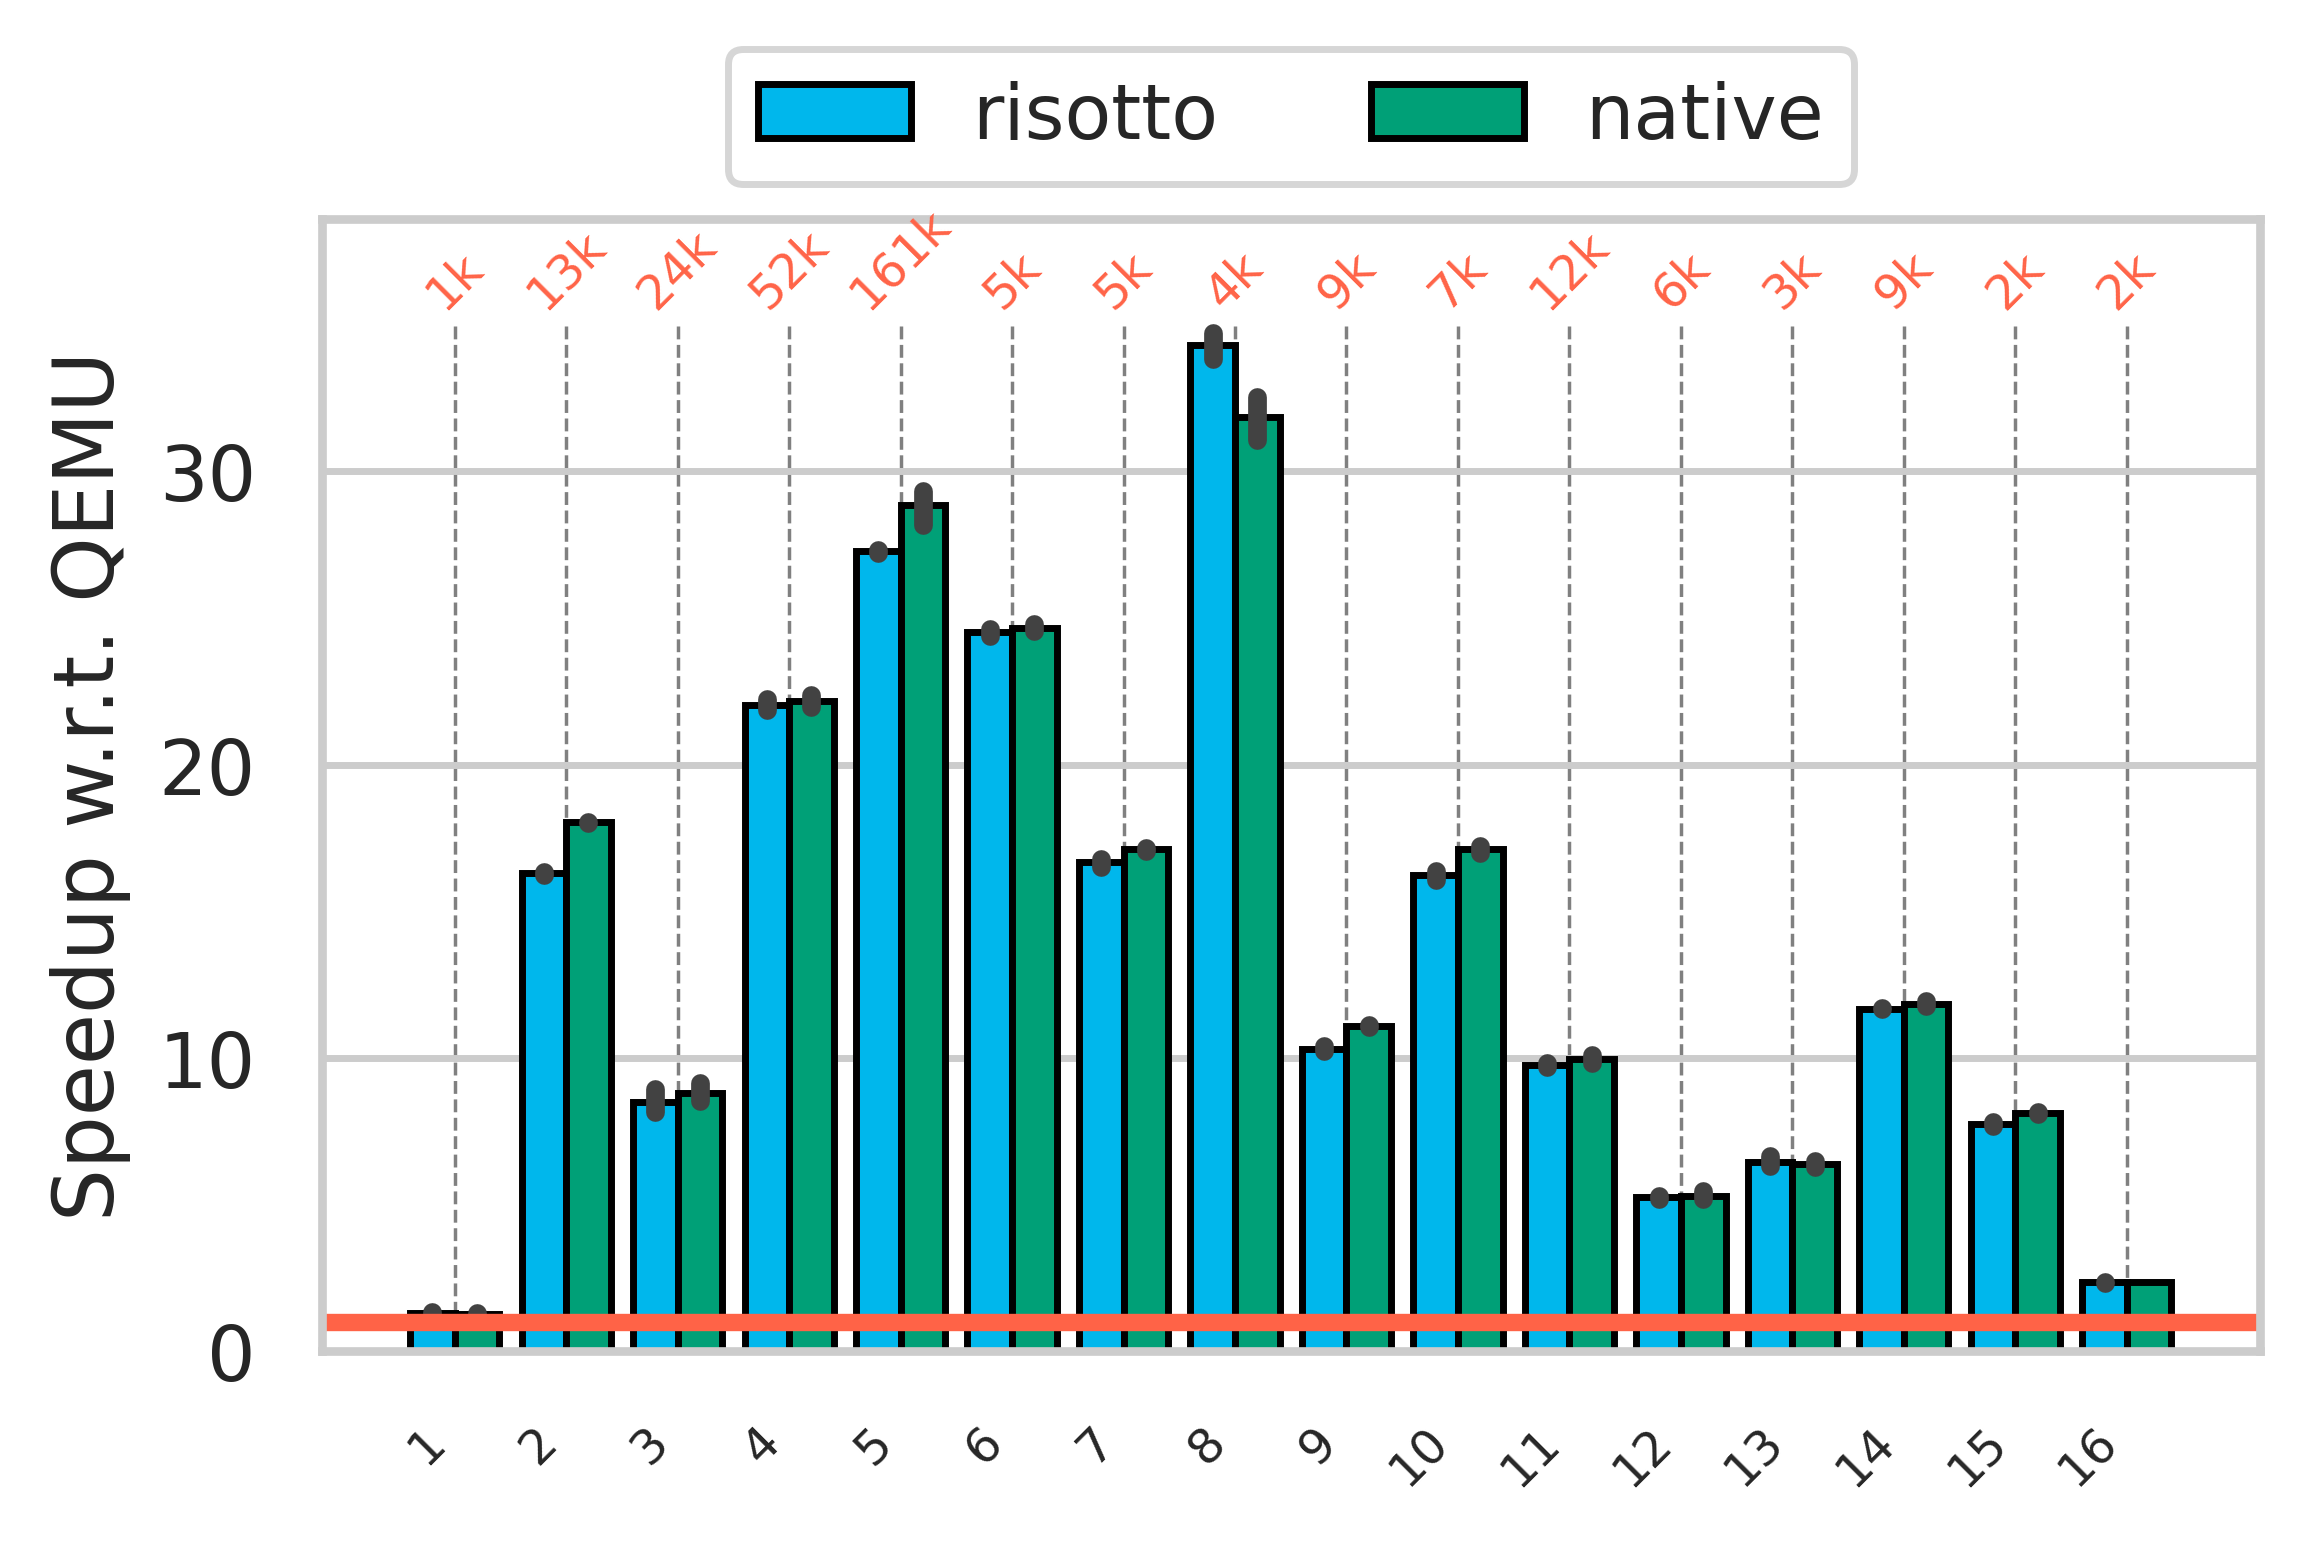

In [30]:
fig = plt.figure(figsize=(5,3), dpi=500)
sbs.set(style="whitegrid")
palette = {
    'orange': '#faa200',
    'sky blue': '#00b7ec',
    'bluish green': '#00a077',
    'yellow': '#f5e636',
    'blue': '#0077b8',
    'vermillion': '#f3640d',
    'reddish purple': '#e47ead'
}
ax = sbs.barplot(data=df_norm, x='test', y='norm', hue='tag',
                 palette=[ palette['blue'], palette['orange'] ],
                 hue_order=['risotto', 'native'])#,
                 #order=sorted_nicely(base_means))
plt.grid(visible=True, axis='y')
plt.xticks(ticks=range(0, len(set(df_norm['test']))),
           labels=[ l for l in sorted_nicely(set(df_norm['test']))],
           rotation=45, ha="right", fontsize='xx-small')
plt.xlabel("")
plt.ylabel("Speedup w.r.t. QEMU")
max_val = max(df_norm['norm'].values)
plt.ylim(0, max_val * 1.1)
plt.axhline(y=1, xmin=0, xmax=1, color='tomato', linewidth=2.5)
# Annotate the raw value of the baseline
for idx, value in enumerate(sorted_nicely(base_means)):
    if base_means[value] > 1000000:
        v = f"{base_means[value] / 1000000:.0f}M"
    elif base_means[value] > 1000:
        v = f"{base_means[value] / 1000:.0f}k"
    else:
        v = f"{base_means[value]:.0f}"
    tmp = max(mean_df.loc[mean_df['bench'] == value].values[0][1:]) / base_means[value]
    plt.text(idx, max(tmp+.3, max_val+.5), f"{v}", fontsize='xx-small', color='tomato', ha='center', rotation=45)
plt.vlines(range(0, len(base_means)), ymin=0, ymax=max_val, linestyle='dashed', colors='grey',
           linewidth=.5, zorder=0)

# Set color + hatch
style = {
    'fill': [ True, True ],
    'color': [ palette['sky blue'], palette['bluish green'] ],
    'hatch': [ '', '', ''],
    'edgecolor': [ 'black', 'black', 'black' ]
}
for idx, bar in enumerate(ax.patches):
    bar_nr = int(idx / len(set(df_norm['test'])))
    bar.set(color=style['color'][bar_nr], fill=style['fill'][bar_nr],
            hatch=style['hatch'][bar_nr], edgecolor=style['edgecolor'][bar_nr])

plt.legend(loc='upper center', bbox_to_anchor=(.5, 1.15), borderaxespad=0, ncol=2)

In [31]:
fig.savefig(f"{input_csv[:-3]}pdf", dpi=500, bbox_inches='tight')

In [32]:
for i in sorted_nicely(base_means):
    print(f"{i:25}: {base_means[i]:>20.1f}")

micro.sqlite-1-multi     :               1337.2
micro.sqlite-2-multi     :              13421.6
micro.sqlite-3-multi     :              23558.2
micro.sqlite-4-multi     :              51997.0
micro.sqlite-5-multi     :             160688.6
micro.sqlite-6-multi     :               4668.4
micro.sqlite-7-multi     :               5056.8
micro.sqlite-8-multi     :               3930.2
micro.sqlite-9-multi     :               8759.0
micro.sqlite-10-multi    :               7099.6
micro.sqlite-11-multi    :              11753.6
micro.sqlite-12-multi    :               5601.2
micro.sqlite-13-multi    :               2693.2
micro.sqlite-14-multi    :               9038.0
micro.sqlite-15-multi    :               1882.0
micro.sqlite-16-multi    :               1942.6


In [33]:
print(value)
max(mean_df.loc[mean_df['bench'] == value].values[0][1:]) / base_means[value]

micro.sqlite-16-multi


1.000000012567725

In [34]:
mean_df['risotto-speedup'] = mean_df['qemu'] / mean_df['risotto']
mean_df

,bench,native,qemu,risotto,risotto-speedup
0,micro.sqlite-1-multi,1034.7,1337.2,1026.4,1.302806
1,micro.sqlite-10-multi,414.9,7099.6,437.6,16.223949
2,micro.sqlite-11-multi,1179.7,11753.6,1203.0,9.770241
3,micro.sqlite-12-multi,1058.9,5601.2,1067.0,5.249485
4,micro.sqlite-13-multi,421.5,2693.2,418.4,6.436902
5,micro.sqlite-14-multi,762.7,9038.0,773.4,11.686062
6,micro.sqlite-15-multi,231.6,1882.0,242.6,7.757626
7,micro.sqlite-16-multi,820.4,1942.6,824.2,2.356952
8,micro.sqlite-2-multi,744.2,13421.6,823.8,16.292304
9,micro.sqlite-3-multi,2682.5,23558.2,2782.4,8.466863


In [35]:
# get average speedup
for s in ['batch', 'multi']:
    d = mean_df.loc[mean_df['serie'] == s]
    print(f"{s}: {np.mean(d['risotto-speedup'].values):.1f}")

KeyError: 'serie'